In [70]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pickle

# 2. Data Visualisation and Exploration

In this section, the computed 768-dimensional BERT embeddings are reduced to a 2-dimensional space using the t-distributed stochastic neighbour embedding (t-SNE). By conducting dimension reduction, we aim to find similar documents that are close to each other in a 2-dimensional vector space while preserving the meaning of the high dimensional embeddings [[5]](#5). We also could compare documents with the highest distances, e. g. the highest and lowest x-values to interpret the x dimension, but this data exploration focuses on similar documents that are represented in the vector space by similar x and y coordinates.

<a id="5">[5]</a> Huroyan, Vahan & Navarrete, Raymundo & Hossain, Md & Kobourov, Stephen. (2022). Embedding Neighborhoods Simultaneously t-SNE (ENS-t-SNE). 10.48550/arXiv.2205.11720. 

In [71]:
with open("data/embeddings.pkl", "rb") as f:
    embeddings = pickle.load(f)

user_reviews = pd.read_csv("data/amazon.csv")
X = np.vstack(embeddings.values)
X.shape

(20000, 768)

In [73]:
RANDOM_STATE = 0
tsne = TSNE(n_components=2, random_state=RANDOM_STATE, init='random', perplexity=50.0)
projections = tsne.fit_transform(X)
fig = px.scatter(
    projections, x=0, y=1,
    color=user_reviews["Positive"].astype(str), labels={'color': 'Positive'},
    hover_name=user_reviews["reviewText"]
)
fig.show()

In the range of (-49, -26) and (-47,-19) you can find a small cluster of negative labelled documents that are all about technical issues, like installation, crashes and technical features that doesn't work properly. In the vector space between (-52.1, -20) and (-51.6, 10) you find a positive document cluster whose reviews praise the alarm clock app. The points (1.13, 2.7) and (1.16, 2.75) don't share a consistent sentiment, but both reviews relate to a translation app. \
There are more document clusters that can be explored but that goes beyond the scope of this data exploration task.

## Word clouds
Next, we create two word clouds, one for the positive reviews and one for the negative reviews. The word clouds scale the tokens by their frequency, the larger the token the higher the frequency. As shown below, you can see that the token "love" and "great" occurs in positive reviews. "App", "play", "kindle fire" and "game" occurs in both positive and negative reviews and are roughly equal in size. In the negative sentiment word cloud you can see tokens, among others "waste", "boring" and "stupid" which don't exist in the positive sentiment word cloud. One more interesting observation is that "fun" occurs in both word clouds but in the positive word cloud it is larger than in the negative word cloud. 

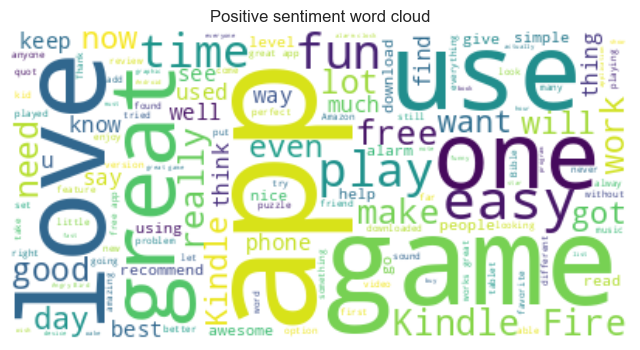

In [34]:
wordcloud = WordCloud(background_color="white")
positive_reviews_str = user_reviews.loc[user_reviews["Positive"] == 1,"reviewText"].str.cat(sep=" ")
negative_reviews_str = user_reviews.loc[user_reviews["Positive"] == 0,"reviewText"].str.cat(sep=" ")

wordcloud_positive = wordcloud.generate(positive_reviews_str)
plt.figure()
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive sentiment word cloud")

plt.show()

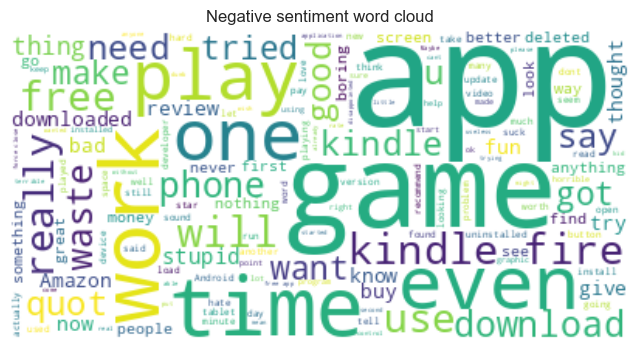

In [33]:
wordcloud_negative = wordcloud.generate(negative_reviews_str)
plt.figure()
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative sentiment word cloud")
plt.show()